In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [136]:
file_path = r"--------"

# Read the file
df = pd.read_csv(file_path)

df.head(2)

,area_sqm,building_year,num_rooms,has_elevator,has_parking,has_storage,price(in_toman),floor_number,district,district_encoded,price_standardized,building_age
0,92,1370,2,0,1,0,10500000000,23,گیشا (کوی نصر),274,-0.161344,33
1,250,1397,4,1,1,1,50000000000,4,سعادت‌آباد,127,2.565746,6


In [137]:
df = df.drop(columns=['price_standardized'])

In [138]:
# Calculate the price per square meter (price per area_sqm) for each property
df['price_per_sqm(in_toman)'] = df['price(in_toman)'] / df['area_sqm']

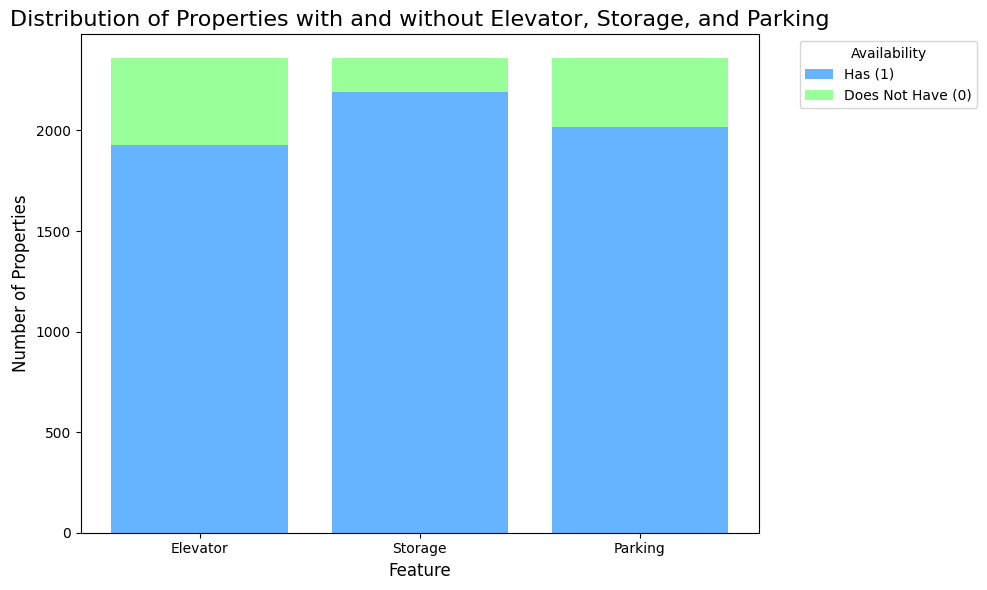

In [139]:

# Get counts of 1s and 0s for each column
elevator_counts = df['has_elevator'].value_counts().sort_index()
storage_counts = df['has_storage'].value_counts().sort_index()
parking_counts = df['has_parking'].value_counts().sort_index()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))

# Plot bars for each column
plt.bar(['Elevator', 'Storage', 'Parking'], [elevator_counts[1], storage_counts[1], parking_counts[1]], label='Has (1)', color='#66b3ff')
plt.bar(['Elevator', 'Storage', 'Parking'], [elevator_counts[0], storage_counts[0], parking_counts[0]], label='Does Not Have (0)', color='#99ff99', bottom=[elevator_counts[1], storage_counts[1], parking_counts[1]])

# Add labels and title
plt.title('Distribution of Properties with and without Elevator, Storage, and Parking', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.legend(title='Availability', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [140]:
# Calculate mean price per square meter for all districts
mean_price_per_sqm_all = df.groupby('district')['price_per_sqm(in_toman)'].mean().reset_index()
mean_price_per_sqm_all.columns = ['District', 'Mean Price per Sqm (in Toman)']

# Convert mean price per square meter to millions
mean_price_per_sqm_all['Mean Price per Sqm (in Million Toman)'] = mean_price_per_sqm_all['Mean Price per Sqm (in Toman)'] / 1_000_000

# Sort to find the top 10 most expensive and top 10 cheapest districts
top_10_expensive = mean_price_per_sqm_all.nlargest(10, 'Mean Price per Sqm (in Million Toman)')
top_10_cheapest = mean_price_per_sqm_all.nsmallest(10, 'Mean Price per Sqm (in Million Toman)')

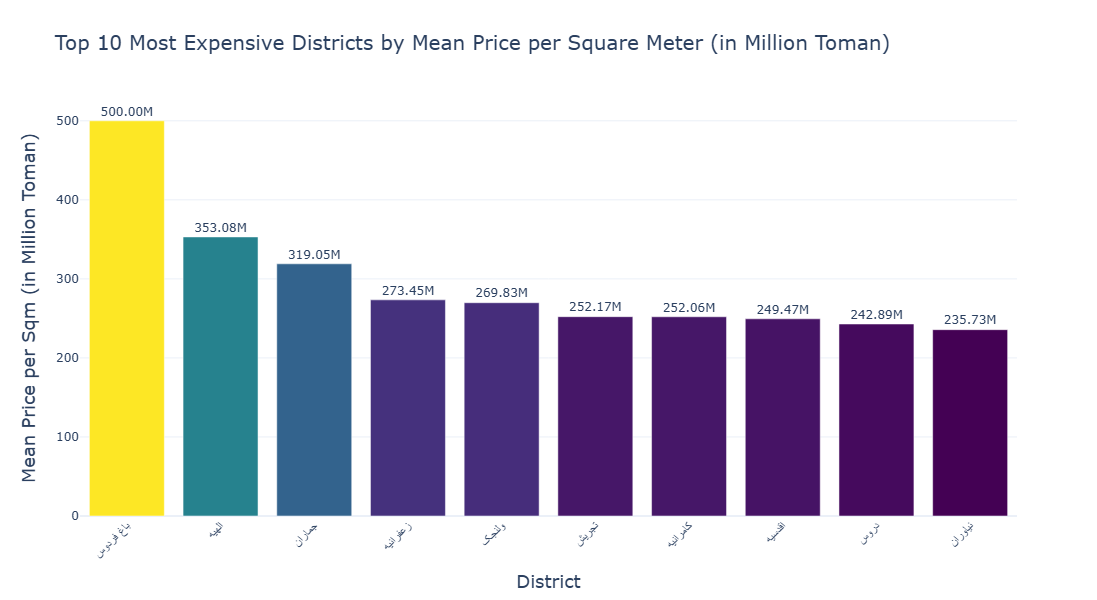

In [141]:
# Create the bar chart for top 10 most expensive districts
fig_expensive = px.bar(top_10_expensive, 
                       x='District', 
                       y='Mean Price per Sqm (in Million Toman)', 
                       title='Top 10 Most Expensive Districts by Mean Price per Square Meter (in Million Toman)',
                       labels={'Mean Price per Sqm (in Million Toman)': 'Mean Price per Sqm (in Million Toman)', 'District': 'District'},
                       text='Mean Price per Sqm (in Million Toman)',  # Display values on top of the bars
                       color='Mean Price per Sqm (in Million Toman)',  # Use the mean price values for color gradient
                       color_continuous_scale=px.colors.sequential.Viridis)  # Use a color scale

# Customize the layout
fig_expensive.update_traces(textposition='outside', texttemplate='%{text:.2f}M')  # Format text as millions with 2 decimal places
fig_expensive.update_layout(
    title_font_size=20,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-45,  # Rotate district names for better readability
    showlegend=False,
    template='plotly_white',
    width=1000,  # Adjust width for better display
    height=600,  # Adjust height for better display
    coloraxis_showscale=False  # Hide the color scale legend
)

# Show the plot
fig_expensive.show()

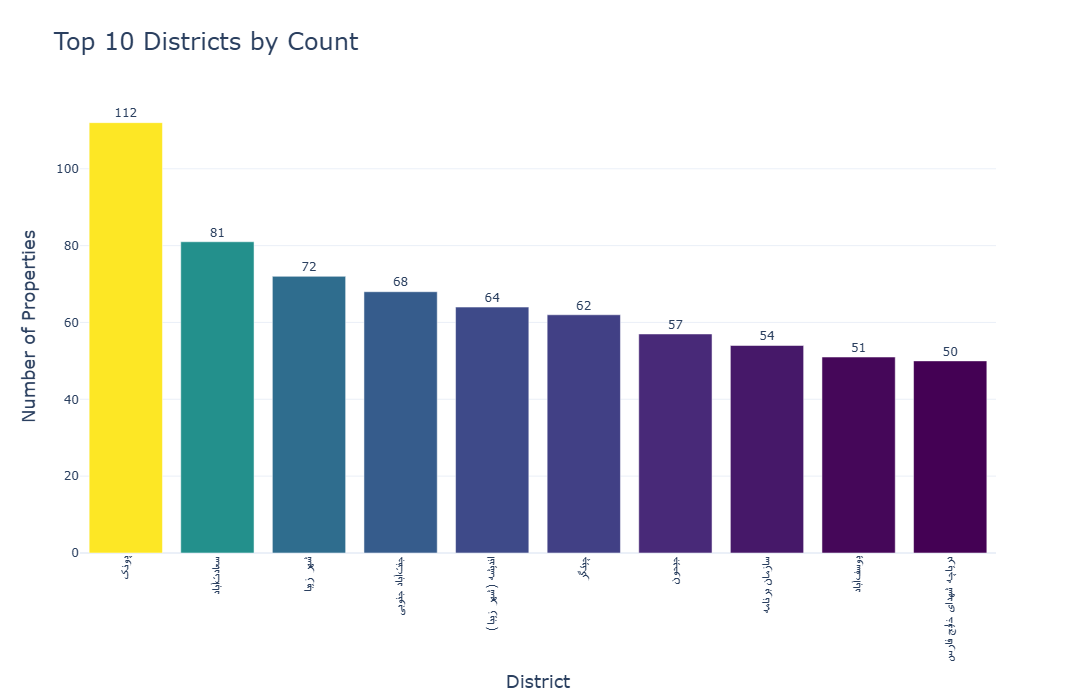

In [142]:
# Assuming df is your DataFrame and district_counts is already calculated
district_counts = df['district'].value_counts()
top_10_districts_by_count = district_counts.nlargest(10)

# Create a DataFrame for Plotly
top_10_districts_df = top_10_districts_by_count.reset_index()
top_10_districts_df.columns = ['District', 'Number of Properties']

# Create the bar chart using Plotly with trend colors
fig = px.bar(top_10_districts_df, 
             x='District', 
             y='Number of Properties', 
             title='Top 10 Districts by Count',
             labels={'Number of Properties': 'Number of Properties', 'District': 'District'},
             text='Number of Properties',
             color='Number of Properties',  # Use the count values for color gradient
             color_continuous_scale=px.colors.sequential.Viridis)  # Use a trendy color scale

# Customize the layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-90,
    showlegend=False,
    template='plotly_white',
    width=1200,  # Increase the width of the chart
    height=700,  # Increase the height of the chart
    coloraxis_showscale=False  # Hide the color scale legend
)

# Show the plot
fig.show()

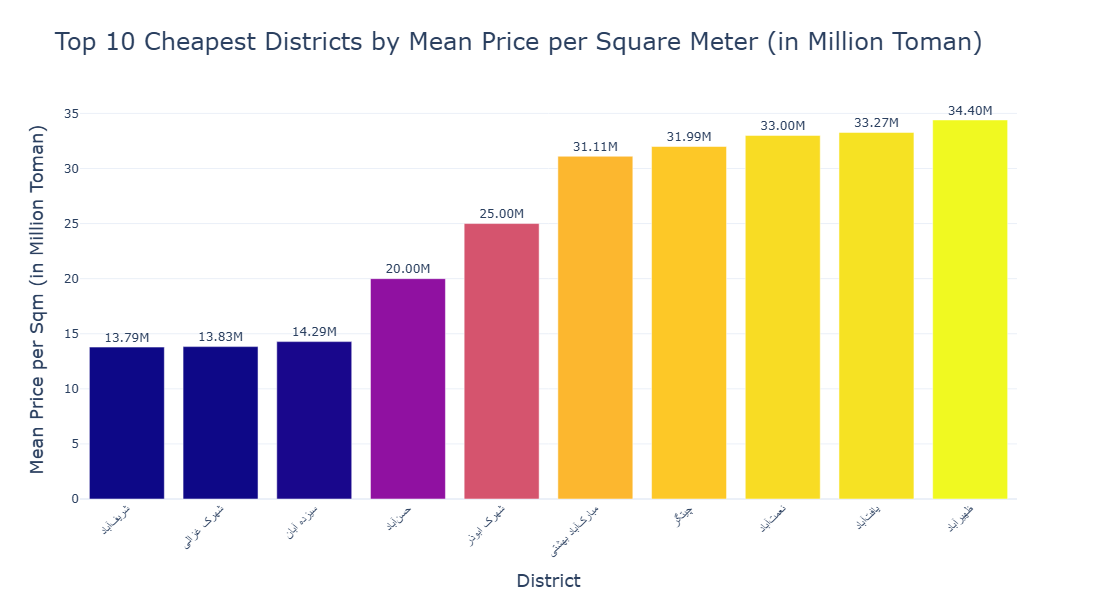

In [143]:
# Create the bar chart for top 10 cheapest districts
fig_cheapest = px.bar(top_10_cheapest, 
                      x='District', 
                      y='Mean Price per Sqm (in Million Toman)', 
                      title='Top 10 Cheapest Districts by Mean Price per Square Meter (in Million Toman)',
                      labels={'Mean Price per Sqm (in Million Toman)': 'Mean Price per Sqm (in Million Toman)', 'District': 'District'},
                      text='Mean Price per Sqm (in Million Toman)',  # Display values on top of the bars
                      color='Mean Price per Sqm (in Million Toman)',  # Use the mean price values for color gradient
                      color_continuous_scale=px.colors.sequential.Plasma)  # Use a different color scale

# Customize the layout
fig_cheapest.update_traces(textposition='outside', texttemplate='%{text:.2f}M')  # Format text as millions with 2 decimal places
fig_cheapest.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-45,  # Rotate district names for better readability
    showlegend=False,
    template='plotly_white',
    width=1000,  # Adjust width for better display
    height=600,  # Adjust height for better display
    coloraxis_showscale=False  # Hide the color scale legend
)

# Show the plot
fig_cheapest.show()

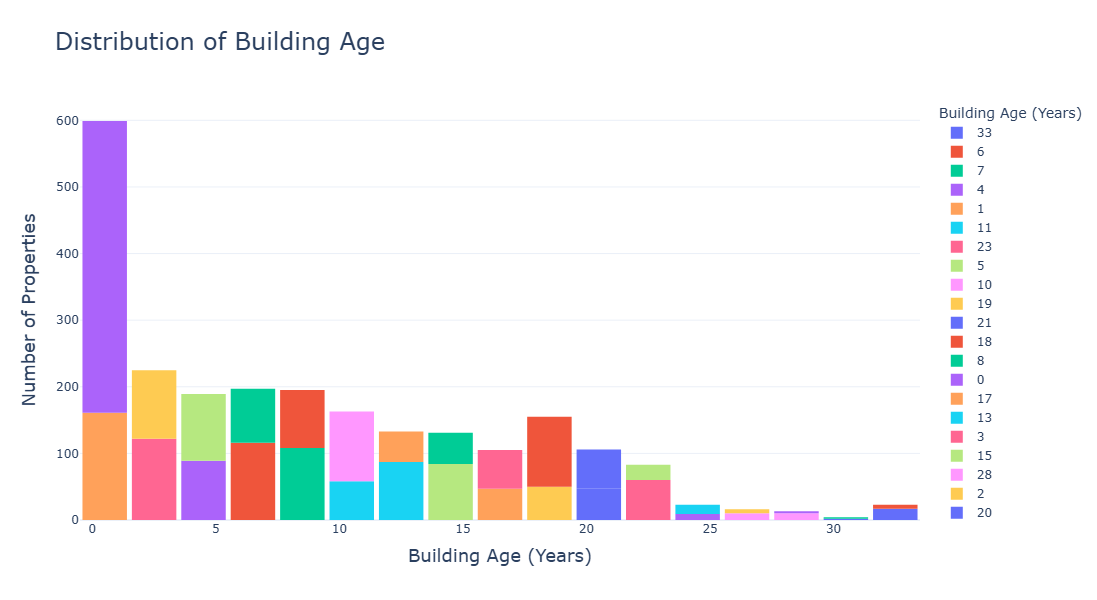

In [144]:
# Create a histogram
fig = px.histogram(df, 
                   x='building_age', 
                   title='Distribution of Building Age',
                   labels={'building_age': 'Building Age (Years)'},
                   nbins=30,  # Adjust the number of bins for better granularity
                   color='building_age',  # Use 'building_age' for different colors
                   color_discrete_sequence=px.colors.qualitative.Plotly)  # Use a qualitative color scale

# Customize the layout
fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_title_text='Building Age (Years)',
    yaxis_title_text='Number of Properties',
    template='plotly_white',
    width=1000,  # Adjust width for better display
    height=600,  # Adjust height for better display
    bargap=0.1  # Add space between bars for better separation
)

# Show the plot
fig.show()

**The number of new houses shows there's a lot of construction going on in the area.   
Let's check out which districts are on top! 🏆**

In [145]:
# filter the houses with building age (0, 1) age
zero_one_year_houses = df[df['building_age'].isin([0, 1])]
# Group by district and count the number of houses
districts_with_zero_one_year = zero_one_year_houses.groupby('district').size().reset_index(name='count')

# Sort by count in descending order and select the top 10 districts
top_10_districts = districts_with_zero_one_year.sort_values(by='count', ascending=False).head(10)

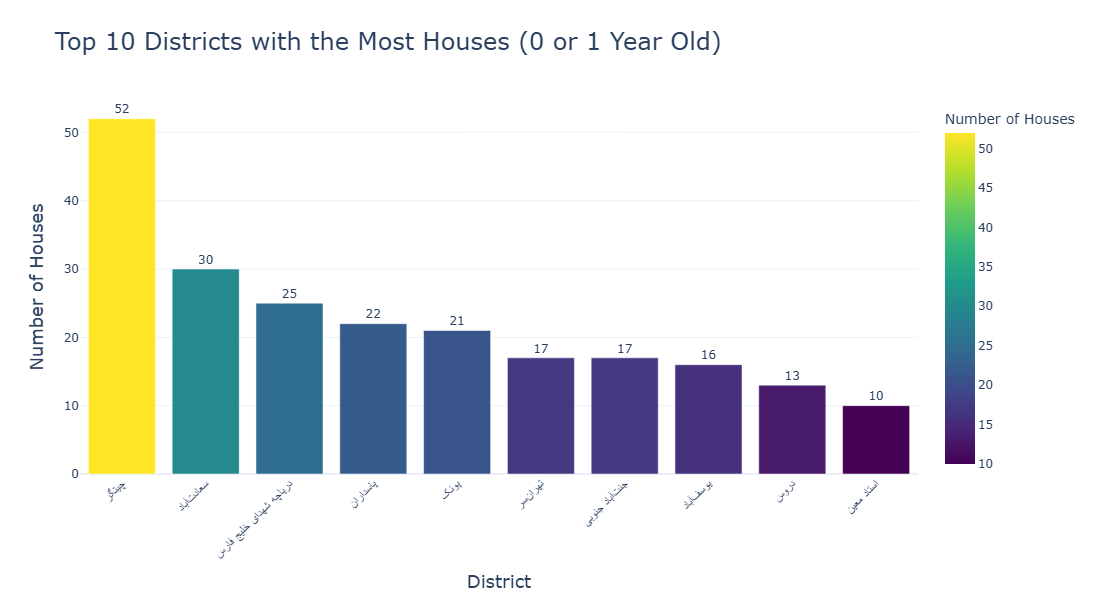

In [146]:
# Create a bar chart for the top 10 districts
fig = px.bar(top_10_districts, 
             x='district', 
             y='count', 
             title='Top 10 Districts with the Most Houses (0 or 1 Year Old)',
             labels={'district': 'District', 'count': 'Number of Houses'},
             text='count',  # Display the count on top of the bars
             color='count',  # Use the count for color gradient
             color_continuous_scale=px.colors.sequential.Viridis)  # Use a color scale

# Customize the layout
fig.update_traces(textposition='outside')  # Display the count outside the bars
fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-45,  # Rotate district names for better readability
    showlegend=False,
    template='plotly_white',
    width=1000,  # Adjust width for better display
    height=600   # Adjust height for better display
)

# Show the plot
fig.show()

In [147]:
# Filter data for 1380-1390
period_1380_1390 = df[(df['building_year'] >= 1380) & (df['building_year'] <= 1390)]

# Filter data for 1390-1400
period_1390_1400 = df[(df['building_year'] >= 1390) & (df['building_year'] <= 1400)]

In [148]:
# Group by number of rooms for 1380-1390
rooms_1380_1390 = period_1380_1390['num_rooms'].value_counts().sort_index().reset_index()
rooms_1380_1390.columns = ['num_rooms', 'count_1380_1390']

# Group by number of rooms for 1390-1400
rooms_1390_1400 = period_1390_1400['num_rooms'].value_counts().sort_index().reset_index()
rooms_1390_1400.columns = ['num_rooms', 'count_1390_1400']

# Merge the two datasets for comparison
rooms_comparison = pd.merge(rooms_1380_1390, rooms_1390_1400, on='num_rooms', how='outer').fillna(0)

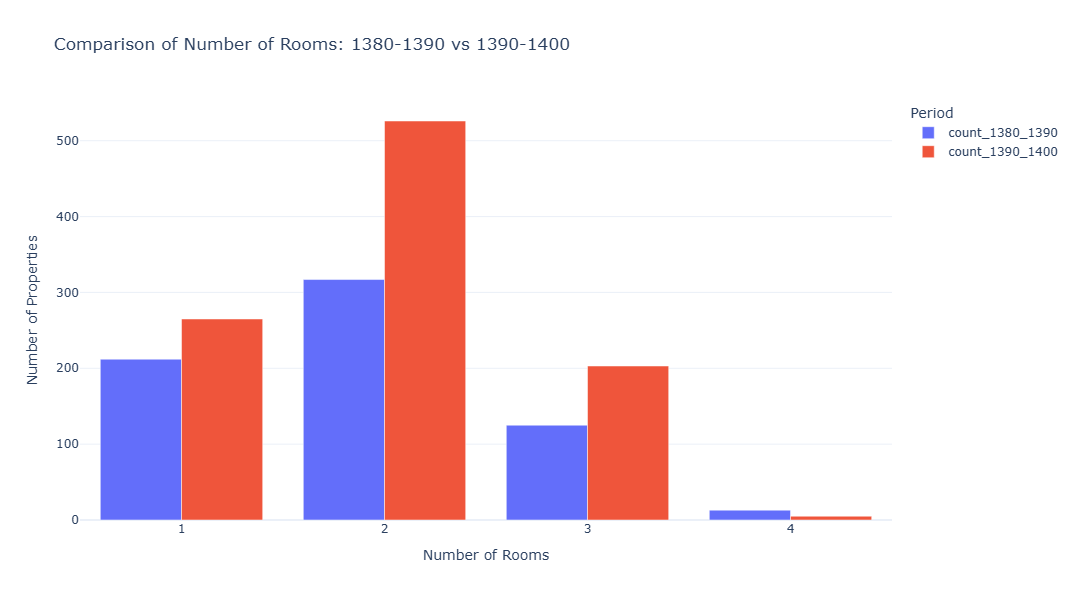

In [149]:
import plotly.express as px

# Reshape data for Plotly
rooms_comparison_melted = rooms_comparison.melt(
    id_vars='num_rooms', 
    value_vars=['count_1380_1390', 'count_1390_1400'], 
    var_name='period', 
    value_name='count'
)

# Plot grouped bar chart
fig = px.bar(
    rooms_comparison_melted, 
    x='num_rooms', 
    y='count', 
    color='period', 
    barmode='group',  # Grouped bars
    title='Comparison of Number of Rooms: 1380-1390 vs 1390-1400',
    labels={'num_rooms': 'Number of Rooms', 'count': 'Number of Properties'},
    color_discrete_sequence=['#636EFA', '#EF553B']  # Custom colors
)

# Customize layout
fig.update_layout(
    xaxis_title='Number of Rooms', 
    yaxis_title='Number of Properties',
    template='plotly_white',
    xaxis_tickangle=0,  # No rotation for x-axis labels
    legend_title_text='Period',
    width=1000,  # Adjust width for better display
    height=600   # Adjust height for better display
)

# Show the plot
fig.show()

In [150]:
period_1400_1403 = df[(df['building_year'] >= 1400) & (df['building_year'] <= 1403)]

In [151]:
# Count buildings in each period
count_1380_1390 = len(period_1380_1390)
count_1390_1400 = len(period_1390_1400)
count_1400_1403 = len(period_1400_1403)

# Create a DataFrame for visualization
building_counts = pd.DataFrame({
    'Period': ['1380-1390', '1390-1400', '1400-1403'],
    'Count': [count_1380_1390, count_1390_1400, count_1400_1403]
})

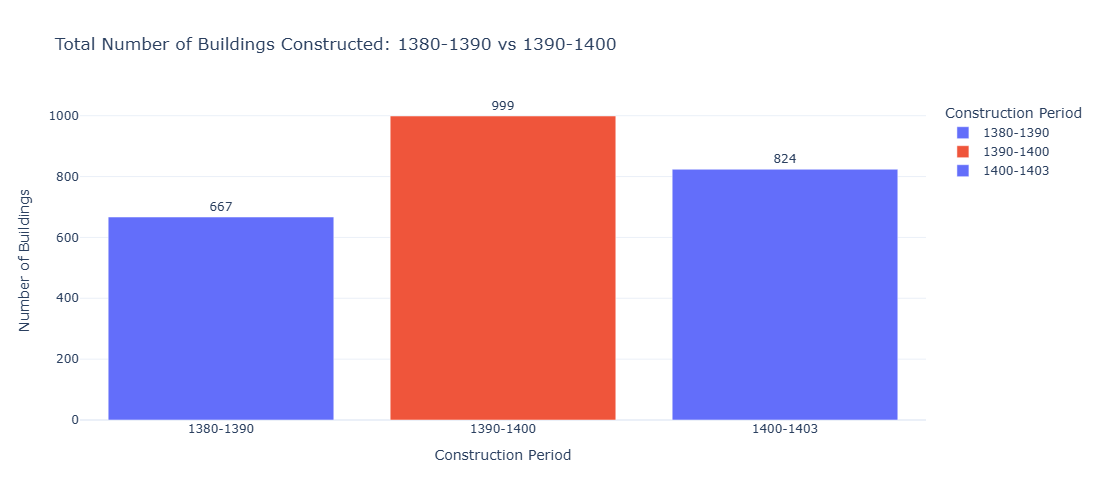

In [152]:
# Plot the bar chart
fig = px.bar(
    building_counts, 
    x='Period', 
    y='Count', 
    title='Total Number of Buildings Constructed: 1380-1390 vs 1390-1400',
    labels={'Count': 'Number of Buildings', 'Period': 'Construction Period'},
    text='Count',  # Display counts on top of bars
    color='Period',  # Color-code by period
    color_discrete_sequence=['#636EFA', '#EF553B']  # Custom colors
)

# Customize layout
fig.update_traces(textposition='outside')  # Display counts outside bars
fig.update_layout(
    xaxis_title='Construction Period', 
    yaxis_title='Number of Buildings',
    template='plotly_white',
    width=800,  # Adjust width for better display
    height=500  # Adjust height for better display
)

# Show the plot
fig.show()

In [153]:
# Filter data for 1375-1403
df_filtered = df[(df['building_year'] >= 1375) & (df['building_year'] <= 1403)]

In [154]:
# Group by building_year and calculate mean price_per_sqm
mean_price_per_sqm_by_year = df_filtered.groupby('building_year')['price_per_sqm(in_toman)'].mean().reset_index()

# Convert price_per_sqm to millions for better readability
mean_price_per_sqm_by_year['price_per_sqm(in_million_toman)'] = mean_price_per_sqm_by_year['price_per_sqm(in_toman)'] / 1_000_000

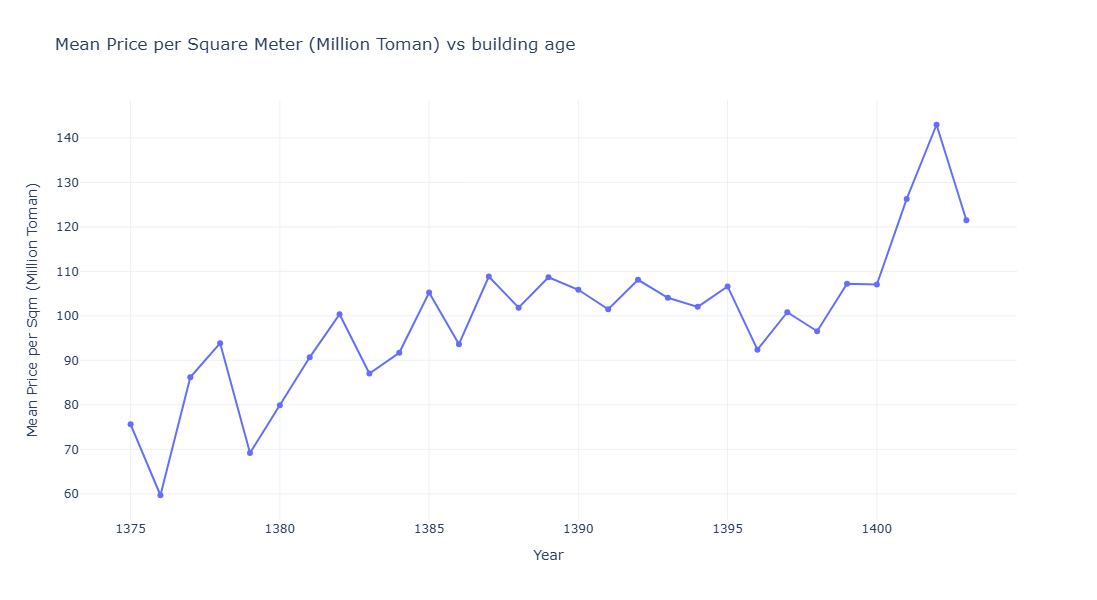

In [155]:
import plotly.express as px

# Plot the line chart
fig = px.line(
    mean_price_per_sqm_by_year, 
    x='building_year', 
    y='price_per_sqm(in_million_toman)', 
    title='Mean Price per Square Meter (Million Toman) vs building age',
    labels={'building_year': 'Year', 'price_per_sqm(in_million_toman)': 'Mean Price per Sqm (Million Toman)'},
    markers=True  # Add markers for each data point
)

# Customize layout
fig.update_layout(
    xaxis_title='Year', 
    yaxis_title='Mean Price per Sqm (Million Toman)',
    template='plotly_white',
    width=1000,  # Adjust width for better display
    height=600   # Adjust height for better display
)

# Show the plot
fig.show()

In [156]:
# Filter data for 1375-1403
df_filtered = df[(df['building_year'] >= 1375) & (df['building_year'] <= 1403)]

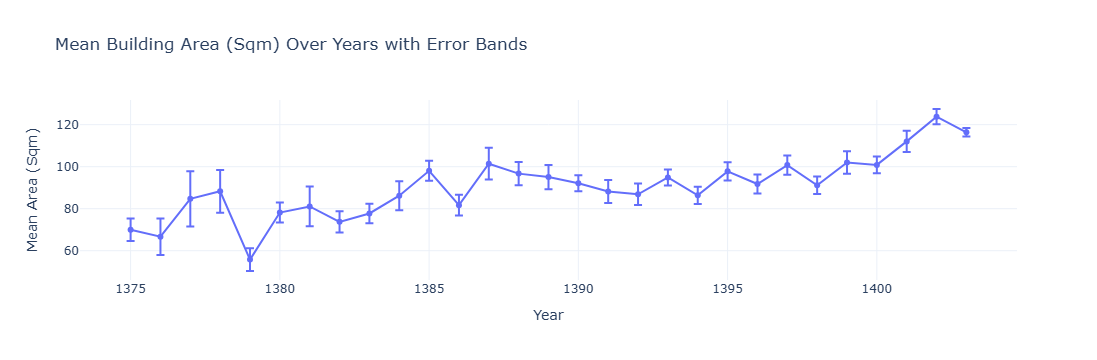

In [157]:
# Calculate standard error (measure of uncertainty)
yearly_stats['std_error'] = df_filtered.groupby('building_year')['area_sqm'].sem().values

# Plot with error bands
fig = px.line(
    yearly_stats,
    x='building_year',
    y='mean_area_sqm',
    error_y='std_error',
    title='Mean Building Area (Sqm) Over Years with Error Bands',
    labels={'building_year': 'Year', 'mean_area_sqm': 'Mean Area (Sqm)'},
    markers=True
)
fig.update_layout(template='plotly_white')
fig.show()